In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/household-power-consumption/household_power_consumption.txt


In [57]:
# load all data
dataset = pd.read_csv('../input/household-power-consumption/household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# summarize
print(dataset.shape)
print(dataset.head())
dataset.tail()



(2075259, 7)
                    Global_active_power Global_reactive_power  Voltage  \
datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:00           15.800          0.

Global_active_power Global_reactive_power  Voltage  \
datetime                                                                 
2010-11-26 20:58:00               0.946                 0.000  240.430   
2010-11-26 20:59:00               0.944                 0.000  240.000   
2010-11-26 21:00:00               0.938                 0.000  239.820   
2010-11-26 21:01:00               0.934                 0.000  239.700   
2010-11-26 21:02:00               0.932                 0.000  239.550   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2010-11-26 20:58:00            4.000          0.000          0.000   
2010-11-26 20:59:00            4.000          0.000          0.000   
2010-11-26 21:00:00            3.800          0.000          0.000   
2010-11-26 21:01:00            3.800          0.000          0.000   
2010-11-26 21:02:00            3.800          0.000          0.000   

                     Sub_metering_3  
datetime                             
2010-11-26 20:58:00             0.0  
2010-11-26 20:59:00             0.0  
2010-11-26 21:00:00             0.0  
2010-11-26 21:01:00             0.0  
2010-11-26 21:02:00             0.0

In [58]:
# mark all missing values
dataset.replace('?',np.nan, inplace=True)

In [59]:
dataset.tail(365)

Global_active_power Global_reactive_power  Voltage  \
datetime                                                                 
2010-11-26 14:58:00               2.254                 0.692  238.020   
2010-11-26 14:59:00               2.226                 0.690  238.100   
2010-11-26 15:00:00               2.240                 0.696  238.820   
2010-11-26 15:01:00               1.588                 0.268  239.910   
2010-11-26 15:02:00               1.452                 0.178  240.940   
...                                 ...                   ...      ...   
2010-11-26 20:58:00               0.946                 0.000  240.430   
2010-11-26 20:59:00               0.944                 0.000  240.000   
2010-11-26 21:00:00               0.938                 0.000  239.820   
2010-11-26 21:01:00               0.934                 0.000  239.700   
2010-11-26 21:02:00               0.932                 0.000  239.550   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2010-11-26 14:58:00           10.000          0.000          0.000   
2010-11-26 14:59:00           10.000          0.000          0.000   
2010-11-26 15:00:00           10.000          0.000          0.000   
2010-11-26 15:01:00            6.800          0.000          0.000   
2010-11-26 15:02:00            6.000          0.000          0.000   
...                              ...            ...            ...   
2010-11-26 20:58:00            4.000          0.000          0.000   
2010-11-26 20:59:00            4.000          0.000          0.000   
2010-11-26 21:00:00            3.800          0.000          0.000   
2010-11-26 21:01:00            3.800          0.000          0.000   
2010-11-26 21:02:00            3.800          0.000          0.000   

                     Sub_metering_3  
datetime                             
2010-11-26 14:58:00            17.0  
2010-11-26 14:59:00            18.0  
2010-11-26 15:00:00            17.0  
2010-11-26 15:01:00            18.0  
2010-11-26 15:02:00            18.0  
...                             ...  
2010-11-26 20:58:00             0.0  
2010-11-26 20:59:00             0.0  
2010-11-26 21:00:00             0.0  
2010-11-26 21:01:00             0.0  
2010-11-26 21:02:00             0.0  

[365 rows x 7 columns]

In [60]:
dataset.describe(include='all')

Global_active_power Global_reactive_power  Voltage Global_intensity  \
count              2049280               2049280  2049280          2049280   
unique                4186                   532     2837              221   
top                  0.218                 0.000  241.180            1.000   
freq                  9565                481561     3559           172785   
mean                   NaN                   NaN      NaN              NaN   
std                    NaN                   NaN      NaN              NaN   
min                    NaN                   NaN      NaN              NaN   
25%                    NaN                   NaN      NaN              NaN   
50%                    NaN                   NaN      NaN              NaN   
75%                    NaN                   NaN      NaN              NaN   
max                    NaN                   NaN      NaN              NaN   

       Sub_metering_1 Sub_metering_2  Sub_metering_3  
count         2049280        2049280    2.049280e+06  
unique             88             81             NaN  
top             0.000          0.000             NaN  
freq          1880175        1436830             NaN  
mean              NaN            NaN    6.458447e+00  
std               NaN            NaN    8.437154e+00  
min               NaN            NaN    0.000000e+00  
25%               NaN            NaN    0.000000e+00  
50%               NaN            NaN    1.000000e+00  
75%               NaN            NaN    1.700000e+01  
max               NaN            NaN    3.100000e+01

In [61]:
columns = list(dataset.columns)

for col in columns:
    dataset[col] = dataset[col].astype(str).astype('float32')

In [62]:
dataset.dtypes

Global_active_power      float32
Global_reactive_power    float32
Voltage                  float32
Global_intensity         float32
Sub_metering_1           float32
Sub_metering_2           float32
Sub_metering_3           float32
dtype: object

In [63]:

dataset.fillna(dataset.mean(),inplace=True)

In [64]:
dataset.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [65]:
import matplotlib.pyplot as plt

df_daily = dataset.resample('D').sum()

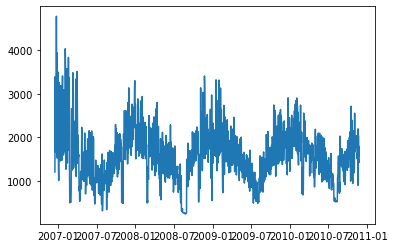

In [66]:

plt.plot(df_daily.index,df_daily.Global_active_power)


In [67]:


dataset.corr()

Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.398231   
Global_reactive_power             0.247017               1.000000 -0.111817   
Voltage                          -0.398231              -0.111817  1.000000   
Global_intensity                  0.998889               0.266120 -0.409785   
Sub_metering_1                    0.484401               0.123111 -0.195225   
Sub_metering_2                    0.434569               0.139231 -0.166764   
Sub_metering_3                    0.638555               0.089617 -0.267145   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Global_active_power            0.998889        0.484401        0.434569   
Global_reactive_power          0.266120        0.123111        0.139231   
Voltage                       -0.409785       -0.195225       -0.166764   
Global_intensity               1.000000        0.489298        0.440347   
Sub_metering_1                 0.489298        1.000000        0.054721   
Sub_metering_2                 0.440347        0.054721        1.000000   
Sub_metering_3                 0.626543        0.102571        0.080872   

                       Sub_metering_3  
Global_active_power          0.638555  
Global_reactive_power        0.089617  
Voltage                     -0.267145  
Global_intensity             0.626543  
Sub_metering_1               0.102571  
Sub_metering_2               0.080872  
Sub_metering_3               1.000000

In [68]:


df_daily.reset_index(inplace=True)


x_test = df_daily.tail(365)
x_train = df_daily[:-365]

df_daily.dtypes

datetime                 datetime64[ns]
Global_active_power             float32
Global_reactive_power           float32
Voltage                         float32
Global_intensity                float32
Sub_metering_1                  float32
Sub_metering_2                  float32
Sub_metering_3                  float32
dtype: object

In [69]:


df_uni = df_daily[['datetime','Global_active_power']]

# making a new dataframe from df_daily2 but renaming the columns
new_df = df_uni.rename(columns={"datetime": "ds", "Global_active_power": "y"})



In [70]:
from fbprophet import Prophet
x_test_uni = new_df.tail(365)
x_train_uni = new_df[:-365]

In [71]:
model = Prophet()

In [72]:
model.fit(x_train_uni)

In [135]:
future = model.make_future_dataframe(periods=365 , freq= 'D' )
result_uni = model.predict(future)


In [136]:
result_uni.shape

(1442, 19)

In [137]:
result_uni.head()

ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2006-12-16  1650.071328  1885.068645  2992.801969  1650.071328  1650.071328   
1 2006-12-17  1649.910702  1838.786749  2994.378216  1649.910702  1649.910702   
2 2006-12-18  1649.750077  1507.456173  2602.666927  1649.750077  1649.750077   
3 2006-12-19  1649.589452  1603.327964  2762.012613  1649.589452  1649.589452   
4 2006-12-20  1649.428826  1673.181123  2776.500551  1649.428826  1649.428826   

   additive_terms  additive_terms_lower  additive_terms_upper      weekly  \
0      775.004842            775.004842            775.004842  245.813256   
1      771.844221            771.844221            771.844221  228.519177   
2      397.001867            397.001867            397.001867 -161.286790   
3      544.306666            544.306666            544.306666  -29.332428   
4      564.208290            564.208290            564.208290  -24.708851   

   weekly_lower  weekly_upper      yearly  yearly_lower  yearly_upper  \
0    245.813256    245.813256  529.191586    529.191586    529.191586   
1    228.519177    228.519177  543.325044    543.325044    543.325044   
2   -161.286790   -161.286790  558.288657    558.288657    558.288657   
3    -29.332428    -29.332428  573.639094    573.639094    573.639094   
4    -24.708851    -24.708851  588.917141    588.917141    588.917141   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper         yhat  
0                         0.0  2425.076170  
1                         0.0  2421.754924  
2                         0.0  2046.751944  
3                         0.0  2193.896118  
4                         0.0  2213.637116

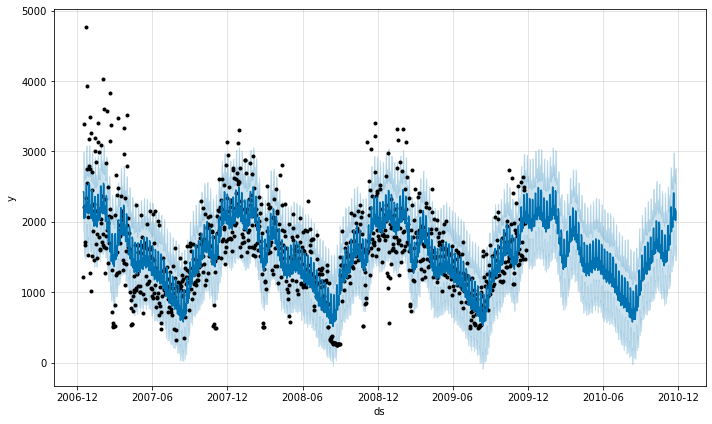

In [138]:
model.plot(result_uni)
plt.show()



In [77]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [78]:
# MAPE
mean_absolute_percentage_error(x_test_uni['y'], result_uni['yhat'][-365:])

20.815831963532684

In [79]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(x_test_uni['y'], result_uni['yhat'][-365:]))
print(rmse)

374.604233946713


In [80]:
# statsmodels is a Python module for statistical models,conducting statistical tests and statistical data exploration.
import statsmodels.api as sm

from pylab import rcParams
#pylab is a module within the matplotlib library that was built to mimic MATLAB’s global style , All module objects starting with “rc” are a means to interact with your plot styles and settings

rcParams['figure.figsize']= 15,8

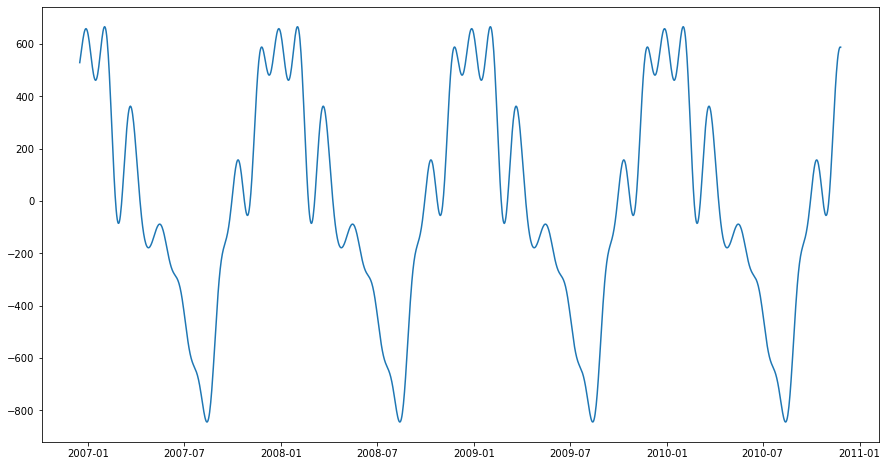

In [81]:


plt.plot(result_uni['ds'],result_uni['yearly'])
plt.show()

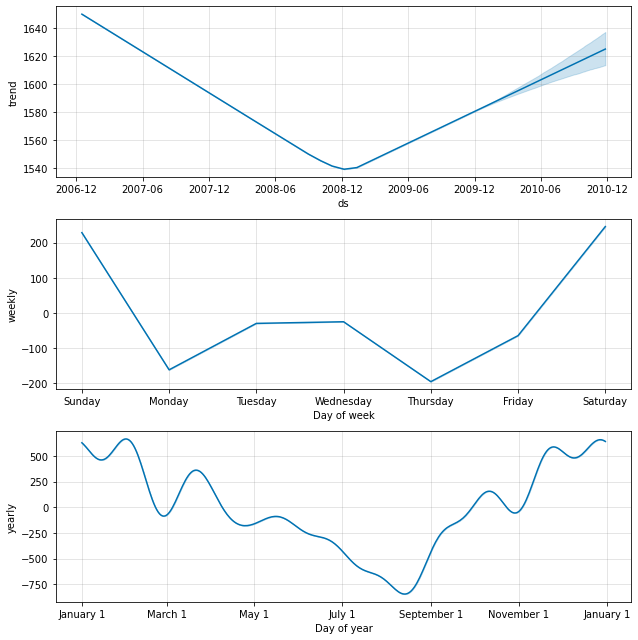

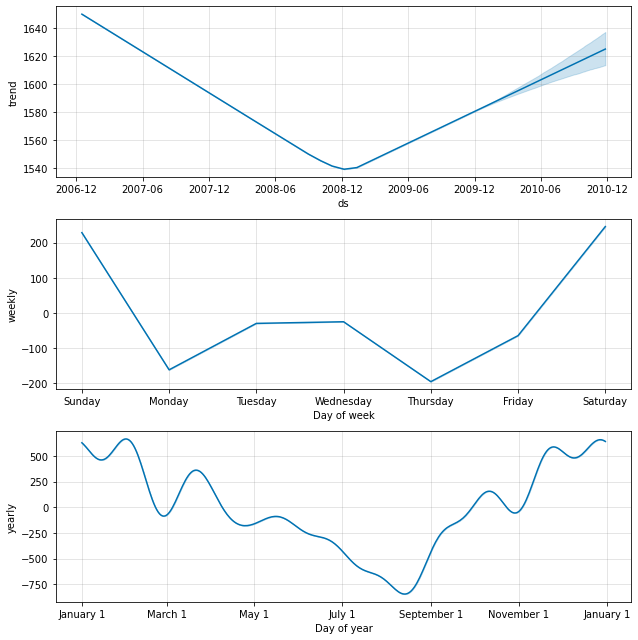

In [82]:
model.plot_components(result_uni)

In [83]:


new_df = df_daily.copy()



# making a new dataframe from df_daily2 but renaming the columns
new_df_mul= new_df.rename(columns={"datetime": "ds", "Global_active_power": "y","Global_reactive_power": "add1","Voltage": "add2","Global_intensity": "add3","Sub_metering_1": "add4","Sub_metering_2": "add5","Sub_metering_3": "add6"})


In [84]:


x_test_multi = new_df_mul.tail(365)
x_train_multi = new_df_mul[:-365]

In [85]:
print(x_train_multi)

             ds            y        add1          add2          add3    add4  \
0    2006-12-16  1209.176025   34.922001   93552.53125   5180.799805     0.0   
1    2006-12-17  3390.459961  226.005997  345725.31250  14398.599609  2033.0   
2    2006-12-18  2203.825928  161.792007  347373.62500   9247.200195  1063.0   
3    2006-12-19  1666.193970  150.942001  348479.00000   7094.000000   839.0   
4    2006-12-20  2225.748047  160.998001  348923.62500   9313.000000     0.0   
...         ...          ...         ...           ...           ...     ...   
1072 2009-11-22  2450.976074  222.638000  347151.87500  10358.200195  6774.0   
1073 2009-11-23  1471.121948  148.337997  349549.50000   6100.799805     0.0   
1074 2009-11-24  2128.855957  153.820007  348446.18750   8899.000000  2491.0   
1075 2009-11-25  1980.130005  175.475998  347297.43750   8309.200195   745.0   
1076 2009-11-26  1599.625977  141.542007  349406.59375   6640.200195  2262.0   

        add5     add6  
0      546.0   

In [120]:
#Adding regressors
# regressor = ['add1','add2','add3','add4','add5','add6]
model_multi = Prophet()
model_multi.add_regressor('add1')
model_multi.add_regressor('add2')
model_multi.add_regressor('add3')
model_multi.add_regressor('add4')
model_multi.add_regressor('add5')
model_multi.add_regressor('add6')


In [121]:
model_multi.fit(x_train_multi)

In [146]:
future_multi = model_multi.make_future_dataframe(periods=365,freq='D')
future_multi['add1'] = new_df_mul['add1'].values
future_multi['add2'] = new_df_mul['add2'].values
future_multi['add3'] = new_df_mul['add3'].values
future_multi['add4'] = new_df_mul['add4'].values
future_multi['add5'] = new_df_mul['add5'].values
future_multi['add6'] = new_df_mul['add6'].values
result_multi= model_multi.predict(future_multi)



In [147]:
future_multi.shape

(1442, 7)

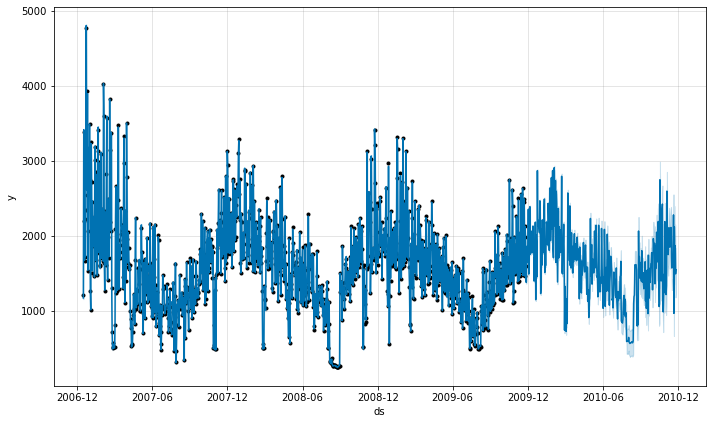

In [148]:
model_multi.plot(result_multi)
plt.show()



In [158]:
# MAPE
mean_absolute_percentage_error( x_test_multi['y'][-365:], result_multi['yhat'][-365:])

3.0445761457342444

In [157]:
rmse_multi = sqrt(mean_squared_error( x_test_multi['y'][-365:], result_multi['yhat'][-365:]))
print(rmse_multi)

729.5560876593075


In [92]:
print(x_train_uni)

             ds            y
0    2006-12-16  1209.176025
1    2006-12-17  3390.459961
2    2006-12-18  2203.825928
3    2006-12-19  1666.193970
4    2006-12-20  2225.748047
...         ...          ...
1072 2009-11-22  2450.976074
1073 2009-11-23  1471.121948
1074 2009-11-24  2128.855957
1075 2009-11-25  1980.130005
1076 2009-11-26  1599.625977

[1077 rows x 2 columns]


In [93]:
print(x_train_multi)

             ds            y        add1          add2          add3    add4  \
0    2006-12-16  1209.176025   34.922001   93552.53125   5180.799805     0.0   
1    2006-12-17  3390.459961  226.005997  345725.31250  14398.599609  2033.0   
2    2006-12-18  2203.825928  161.792007  347373.62500   9247.200195  1063.0   
3    2006-12-19  1666.193970  150.942001  348479.00000   7094.000000   839.0   
4    2006-12-20  2225.748047  160.998001  348923.62500   9313.000000     0.0   
...         ...          ...         ...           ...           ...     ...   
1072 2009-11-22  2450.976074  222.638000  347151.87500  10358.200195  6774.0   
1073 2009-11-23  1471.121948  148.337997  349549.50000   6100.799805     0.0   
1074 2009-11-24  2128.855957  153.820007  348446.18750   8899.000000  2491.0   
1075 2009-11-25  1980.130005  175.475998  347297.43750   8309.200195   745.0   
1076 2009-11-26  1599.625977  141.542007  349406.59375   6640.200195  2262.0   

        add5     add6  
0      546.0   

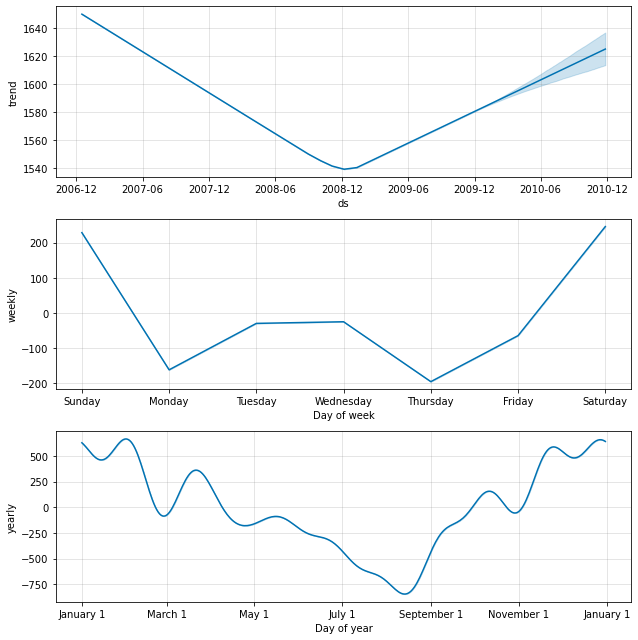

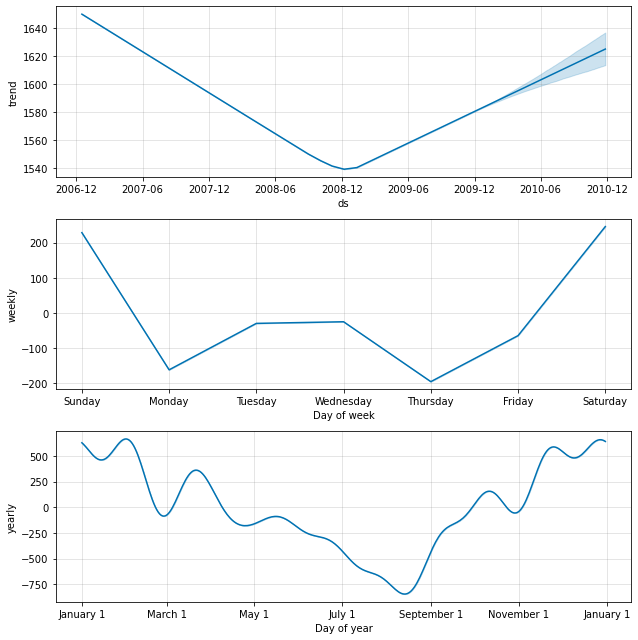

In [94]:
model_multi.plot_components(result_multi)